**1. Load the data :
Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.*

In [1]:
import pandas as pd
House=pd.read_excel("housing.xlsx")
House.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Exploratory Data Analysis Mannually

**2. Handle missing values :
Fill the missing values with the mean of the respective column**

In [4]:
House.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
Mean=House.total_bedrooms.mean()
Mean

537.8705525375618

In [6]:
House.total_bedrooms=House.total_bedrooms.fillna(Mean)

In [7]:
House.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**3. Encode categorical data :
Convert categorical column in the dataset to numerical data.**

In [9]:
House.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lebel = LabelEncoder()
House['ocean_proximity']=lebel.fit_transform(House['ocean_proximity'])
House

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


**Standardize data :Standardize training and test datasets.**

In [13]:
X_features=House.columns

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Create the Scaler object
scaler = StandardScaler()
# Fit data on the scaler object
Scaled_df = scaler.fit_transform(House)
House_standarded = pd.DataFrame(Scaled_df,columns=X_features)
House_standarded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


In [15]:
House_standarded.mean()

longitude            -6.527810e-15
latitude              1.256263e-15
housing_median_age    8.557001e-16
total_rooms           1.475181e-16
total_bedrooms        2.724793e-16
population           -6.465442e-17
households            2.139358e-16
median_income         3.734255e-16
ocean_proximity      -8.231692e-15
median_house_value    8.950635e-16
dtype: float64

In [16]:
House_standarded.std()

longitude             1.000024
latitude              1.000024
housing_median_age    1.000024
total_rooms           1.000024
total_bedrooms        1.000024
population            1.000024
households            1.000024
median_income         1.000024
ocean_proximity       1.000024
median_house_value    1.000024
dtype: float64

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

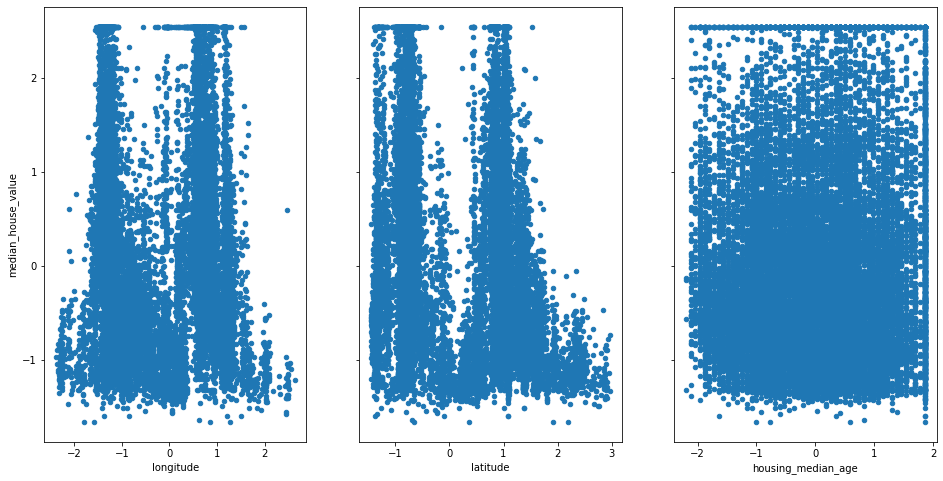

In [18]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
House_standarded.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
House_standarded.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
House_standarded.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

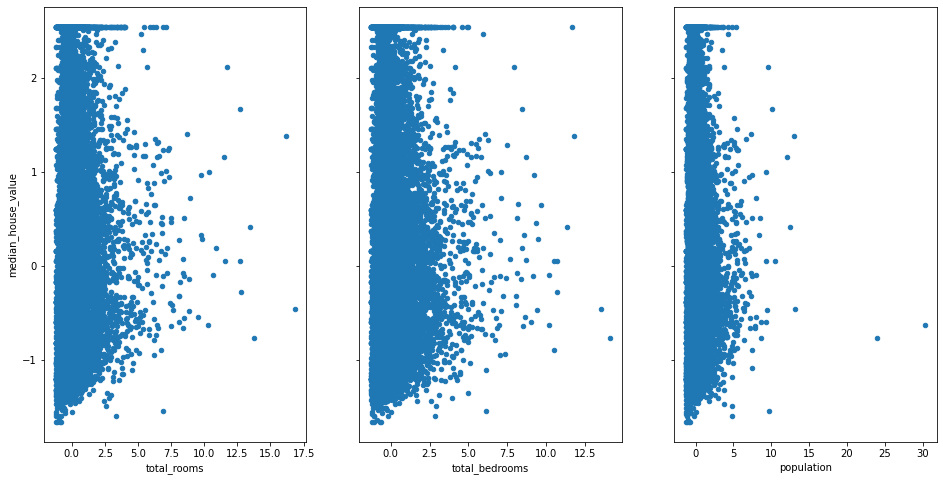

In [19]:
fig,axs=plt.subplots(1,3,sharey=True)
House_standarded.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
House_standarded.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
House_standarded.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

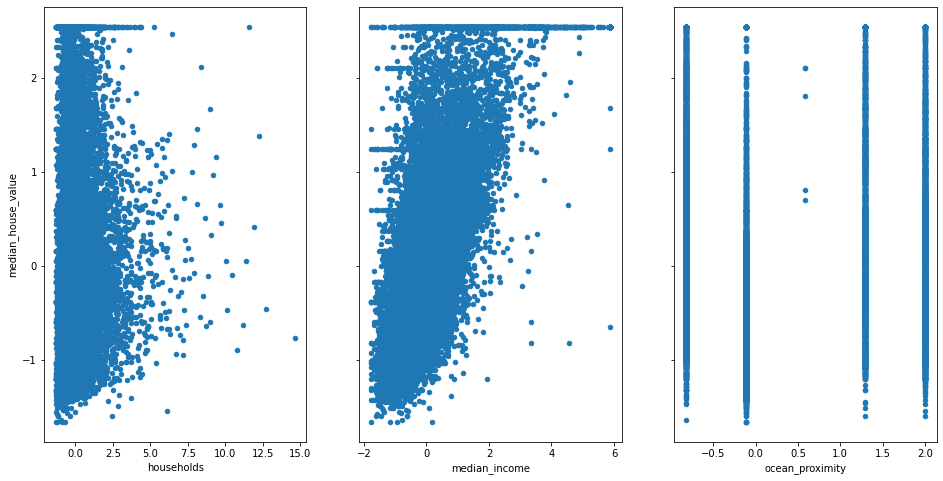

In [20]:
fig,axs=plt.subplots(1,3,sharey=True)
House_standarded.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
House_standarded.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
House_standarded.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

**Insight:Only median_income and median_house_value has a linear relationship.**
 

**Extract input (X) and output (Y) data from the dataset.**

In [23]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']


X=House_standarded[X_Features]
Y=House_standarded.median_house_value

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
print(House_standarded.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


**4. Split the dataset : Split the data into 80% training dataset and 20% test dataset.**

In [26]:
from sklearn.model_selection import train_test_split as split

##Train X dataframe without "median_house_value"

In [28]:
train, test = split(House_standarded, test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# create a linear model object 
lm = LinearRegression()
lm.fit(train.drop(columns = 'median_house_value'), train.median_house_value)

LinearRegression()

**Train Y dataseries containing only "median_income"**

**6. Perform Linear Regression : Perform Linear Regression on training data.**

In [33]:
lm.intercept_

0.0004068067832765398

In [34]:
lm.coef_

array([-0.74949922, -0.79544927,  0.12480841, -0.11697516,  0.29668592,
       -0.3828979 ,  0.25138068,  0.64898639, -0.00259801])

In [35]:
lm.score(train.drop(columns = 'median_house_value'), train.median_house_value)

0.6334177714893854

In [36]:
from statsmodels.formula.api import ols

In [37]:
Formula='median_house_value~'+'+'.join(X_Features)
Formula

'median_house_value~longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity'

In [38]:
# create model obejct & fit
mod = ols(Formula, data = train).fit()

In [39]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     3168.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:31:05   Log-Likelihood:                -15142.
No. Observations:               16512   AIC:                         3.030e+04
Df Residuals:                   16502   BIC:                         3.038e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0004      0.005      0.086      0.931      -0.009       0.010
longitude             -0.7495      0.015    -51.673      0.000      -0.778      -0.721
latitude              -0.7954      0.014    -55.550      0.000      -0.824      -0.767
housing_median_age     0.1248      0.005     23.653      0.000       0.114       0.135
total_rooms           -0.1170      0.017     -6.968      0.000      -0.150      -0.084
total_bedrooms         0.2967      0.025     11.929      0.000       0.248       0.345
population            -0.3829      0.012    -32.540      0.000      -0.406      -0.360
households             0.2514      0.025      9.901      0.000       0.202       0.301
median_income          0.6490      0.006    105.421      0.000       0.637       0.661
ocean_proximity       -0.0026      0.005     -0.513      0.608      -0.013       0.007
==============================================================================
Omnibus:                     4126.185   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16334.016
Skew:                           1.195   Prob(JB):                         0.00
Kurtosis:                       7.246   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predict output for test dataset using the fitted model.**

In [41]:
y_train_fitted = lm.predict(train.drop(columns = 'median_house_value'))
y_test_fitted = lm.predict(test.drop(columns = 'median_house_value'))

In [42]:
y_train_fitted

array([-0.03236506, -0.54186056, -1.15244131, ..., -0.33161676,
        0.25380049, -0.80021704])

In [43]:
y_test_fitted

array([ 0.3896904 ,  0.17186909, -0.91333326, ..., -0.44356644,
       -0.18617421, -0.85986756])

**Print root mean squared error (RMSE) from Linear Regression.**

In [45]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
rmse_train=mse(y_true = train.median_house_value, y_pred = y_train_fitted, squared = False)
rmse_test = mse(y_true = test.median_house_value, y_pred = y_test_fitted, squared = False)

In [47]:
rmse_train

0.6053859914817373

In [48]:
rmse_test

0.596850678295479

In [49]:
mod.resid

697     -0.415287
13680   -0.442220
5201     0.064368
6414    -0.122567
15265    0.498687
           ...   
6679    -0.072913
16414    0.253162
12935    0.411727
5338     1.075088
16264   -0.455111
Length: 16512, dtype: float64

In [50]:
mod.fittedvalues

697     -0.032365
13680   -0.541861
5201    -1.152441
6414    -0.268755
15265   -0.101399
           ...   
6679     0.380940
16414   -0.854203
12935   -0.331617
5338     0.253800
16264   -0.800217
Length: 16512, dtype: float64

In [51]:
#pip install seaborn
#conda install seaborn

In [52]:
import seaborn as sns

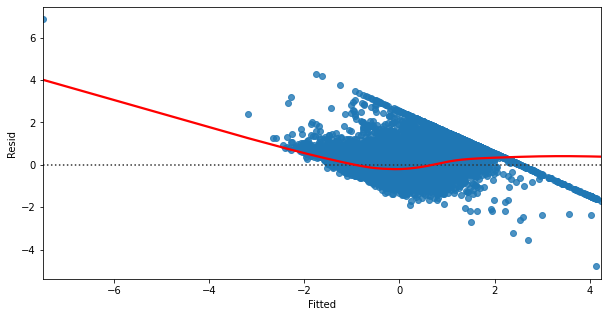

In [53]:

resid = mod.resid
fitted = mod.fittedvalues
plt.figure(figsize = (10,5))
sns.residplot(x = fitted, y = resid, lowess = True, line_kws={'color':'red'} )
plt.ylabel('Resid')
plt.xlabel('Fitted')
plt.show()

**7.Perform Linear Regression with one independent variable :Extract just the median_income column from the independent variables (from X_train and X_test).**

**Perform Linear Regression to predict housing values based on median_income.**

In [57]:
lm1 = LinearRegression()
lm1.fit(train[['median_income']], train.median_house_value)

LinearRegression()

In [58]:
lm1.coef_

array([0.68465811])

In [59]:
lm1.intercept_

0.0011254604785915208

In [60]:
lm1.score(train[['median_income']], train.median_house_value)

0.4715091497962388

In [61]:
from statsmodels.formula.api import ols

In [62]:
# create model obejct & fit
mod1 = ols('median_house_value~median_income', data = train).fit()

In [63]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 1.473e+04
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:32:49   Log-Likelihood:                -18162.
No. Observations:               16512   AIC:                         3.633e+04
Df Residuals:                   16510   BIC:                         3.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0011      0.006      0.199      0.842      -0.010       0.012
median_income     0.6847      0.006    121.367      0.000       0.674       0.696
==============================================================================
Omnibus:                     3393.129   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7452.433
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predict output for test dataset using the fitted model.**

In [65]:
y1_train_fitted = lm1.predict(train[['median_income']])
y1_test_fitted = lm1.predict(test[['median_income']])

In [66]:
y1_train_fitted

array([-0.44008824, -0.21880945, -1.07120132, ..., -0.02906468,
        0.02931832, -0.61599407])

In [67]:
y1_test_fitted

array([-0.06643701,  0.0594108 , -0.8413813 , ..., -0.72043478,
       -0.0570669 , -0.07389706])

**Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.**

In [69]:
rmse1_train=mse(y_true = train.median_house_value, y_pred = y1_train_fitted, squared = False)
rmse1_test = mse(y_true = test.median_house_value, y_pred = y1_test_fitted, squared = False)

In [70]:
rmse1_train

0.7268844865864883

In [71]:
rmse1_test

0.7206823362097399

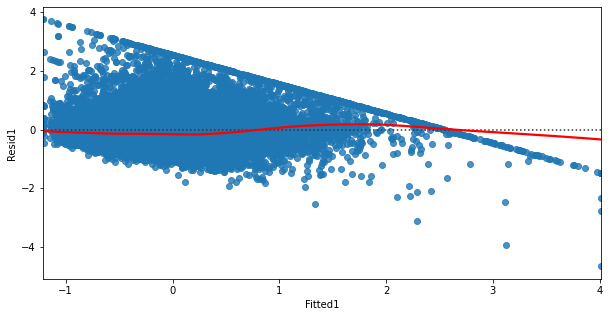

In [72]:
resid1 = mod1.resid
fitted1 = mod1.fittedvalues
plt.figure(figsize = (10,5))
sns.residplot(x = fitted1, y = resid1, lowess = True, line_kws={'color':'red'} )
plt.ylabel('Resid1')
plt.xlabel('Fitted1')
plt.show()